In [63]:
!pip install geopandas

import gc
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = ('C:/k_digital/Project Data')

plt.rc('font', family='Malgun Gothic')

In [64]:
# 지하철 휠체어 리프트 보유 역 비율 분석

In [65]:
sub = pd.read_csv(path + '/서울시 지하철 역사 노약자 장애인 편의시설 현황.csv', encoding = 'euc-kr')

In [66]:
sub

,호선,역명,엘리베이터(E/V),에스컬레이터(E/S),휠체어리프트(W/L),수평자동보도(M/W)
0,1호선,서울역(1),4,5,1,0
1,1호선,시청(1),3,3,0,0
2,1호선,종각,4,2,0,0
3,1호선,종로3가(1),3,4,0,0
4,1호선,종로5가,3,0,0,0
...,...,...,...,...,...,...
281,9호선(3단계),송파나루역,5,6,0,0
282,9호선(3단계),한성백제역,3,12,0,0
283,9호선(3단계),올림픽공원역,3,14,0,0
284,9호선(3단계),둔촌오륜역,3,8,0,0


In [67]:
# 9호선(*단계) 를 9호선으로 수정

In [68]:
guho = sub['호선'].str[:3] == '9호선'

In [69]:
sub.loc[guho, '호선'] = '9호선'


In [70]:
sub

,호선,역명,엘리베이터(E/V),에스컬레이터(E/S),휠체어리프트(W/L),수평자동보도(M/W)
0,1호선,서울역(1),4,5,1,0
1,1호선,시청(1),3,3,0,0
2,1호선,종각,4,2,0,0
3,1호선,종로3가(1),3,4,0,0
4,1호선,종로5가,3,0,0,0
...,...,...,...,...,...,...
281,9호선,송파나루역,5,6,0,0
282,9호선,한성백제역,3,12,0,0
283,9호선,올림픽공원역,3,14,0,0
284,9호선,둔촌오륜역,3,8,0,0


In [71]:
# 사용하지 않는 컬럼 제거

In [72]:
del sub['역명']
del sub['에스컬레이터(E/S)']
del sub['수평자동보도(M/W)']
del sub['엘리베이터(E/V)']

sub

,호선,휠체어리프트(W/L)
0,1호선,1
1,1호선,0
2,1호선,0
3,1호선,0
4,1호선,0
...,...,...
281,9호선,0
282,9호선,0
283,9호선,0
284,9호선,0


In [73]:
# 9호선 제거
sub = sub[~sub['호선'].str.contains('9호선', na=False)]

In [74]:
# 데이터형식 확인
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   호선           273 non-null    object
 1   휠체어리프트(W/L)  273 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [75]:
# 컬럼 명 변경
sub.rename(columns = {'휠체어리프트(W/L)':'WL'}, inplace = True)

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_5220\3623578363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.rename(columns = {'휠체어리프트(W/L)':'WL'}, inplace = True)


In [76]:
# 도입 여부만 확인하기 위해 도입 대수 1 초과 값을 1로 수정
sub['WL'][sub['WL'] > 1] = 1

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_5220\168855511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['WL'][sub['WL'] > 1] = 1
C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_5220\168855511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['WL'][sub['WL'] > 1] = 1


In [77]:
# 휠체어리프트 설치 역 수
sub_wl = sub['WL'].sum()
sub_wl

61

In [78]:
# 호선별 설치 역 수 
wl = sub.groupby(by = '호선').sum()
wl

,WL
호선,
1호선,3
2호선,6
3호선,2
4호선,6
5호선,10
6호선,17
7호선,14
8호선,3


In [79]:
# 지하철역 데이터 로드

In [80]:
sta = pd.read_excel(path + '/서울교통공사 노선별 지하철역 정보.xlsx')

In [81]:
# 사용하지 않는 컬럼 제거
del sta['전철역코드']
del sta['외부코드']
del sta['전철명명(중문)']
del sta['전철명명(일문)']
del sta['전철명명(영문)']
sta

,전철역명,호선
0,소요산,01호선
1,동두천,01호선
2,보산,01호선
3,덕정,01호선
4,지행,01호선
...,...,...
772,박촌,인천선
773,선학,인천선
774,귤현,인천선
775,동막,인천선


In [82]:
# 호선 컬럼에 '호선'이 포함된 행만 추출
sta = sta[sta['호선'].str.contains('호선', na=False)]

In [83]:
# '인천'이 포함된 행 제거
# ~를 이용해 조건을 반대로 만듦
sta = sta[~sta['호선'].str.contains('인천', na=False)]

In [84]:
# 9호선 제거
sta = sta[~sta['호선'].str.contains('09호선', na=False)]

In [85]:
sta

,전철역명,호선
0,소요산,01호선
1,동두천,01호선
2,보산,01호선
3,덕정,01호선
4,지행,01호선
...,...,...
406,석촌,08호선
407,잠실,08호선
408,강동구청,08호선
409,천호,08호선


In [86]:
# 중복역 제거
st = sta.drop_duplicates(subset=['전철역명'])
st

,전철역명,호선
0,소요산,01호선
1,동두천,01호선
2,보산,01호선
3,덕정,01호선
4,지행,01호선
...,...,...
403,문정,08호선
405,송파,08호선
406,석촌,08호선
408,강동구청,08호선


In [87]:
# 역 개수를 세기 위한 열 생성
st['count'] = 1
st

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_5220\908657762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['count'] = 1


,전철역명,호선,count
0,소요산,01호선,1
1,동두천,01호선,1
2,보산,01호선,1
3,덕정,01호선,1
4,지행,01호선,1
...,...,...,...
403,문정,08호선,1
405,송파,08호선,1
406,석촌,08호선,1
408,강동구청,08호선,1


In [88]:
# 호선별 역 수 추출
st = st.groupby(by = '호선').sum()
st

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_5220\774434581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st = st.groupby(by = '호선').sum()


,count
호선,
01호선,99
02호선,48
03호선,41
04호선,44
05호선,47
06호선,29
07호선,44
08호선,15


In [89]:
# Index로 설정되어있던 '호선'을 컬럼으로 추출
st = st.reset_index()

In [90]:
# 01호선, 02호선 ... 을 1호선, 2호선으로 변경

st['호선'] = st['호선'].str[1:]
st

,호선,count
0,1호선,99
1,2호선,48
2,3호선,41
3,4호선,44
4,5호선,47
5,6호선,29
6,7호선,44
7,8호선,15


In [91]:
# 호선 컬럼 기준으로 데이터프레임 결합
wlst = pd.merge(wl, st, on = '호선')
wlst

,호선,WL,count
0,1호선,3,99
1,2호선,6,48
2,3호선,2,41
3,4호선,6,44
4,5호선,10,47
5,6호선,17,29
6,7호선,14,44
7,8호선,3,15


In [92]:
wlst['per'] = round(wlst['WL'] / wlst['count'], 3) * 100
wlst

,호선,WL,count,per
0,1호선,3,99,3.0
1,2호선,6,48,12.5
2,3호선,2,41,4.9
3,4호선,6,44,13.6
4,5호선,10,47,21.3
5,6호선,17,29,58.6
6,7호선,14,44,31.8
7,8호선,3,15,20.0


In [93]:
wlst['ho'] = wlst.index
wlst

,호선,WL,count,per,ho
0,1호선,3,99,3.0,0
1,2호선,6,48,12.5,1
2,3호선,2,41,4.9,2
3,4호선,6,44,13.6,3
4,5호선,10,47,21.3,4
5,6호선,17,29,58.6,5
6,7호선,14,44,31.8,6
7,8호선,3,15,20.0,7


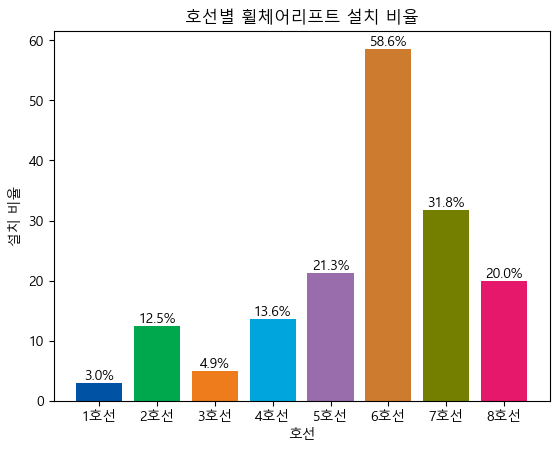

In [97]:
# 호선별 색 지정
colors = ('#0052A4', '#00A84D', '#EF7C1C', '#00A5DE', '#996CAC', '#CD7C2F', '#747F00', '#E6186C')


# 그래프화
plt.bar(wlst['호선'], wlst['per'], color = colors)
plt.xlabel('호선')
plt.ylabel('설치 비율(%)')
plt.title('호선별 휠체어리프트 설치 비율')

for i, v in enumerate(wlst['per']):
    plt.text(i, round(v, 2), str(round(v, 2)) + '%', ha='center', va='bottom')


plt.show()